<a href="https://colab.research.google.com/github/GitPilottiti/PytorchIdimagenes/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving odiseo-castrejon-cx8ooha2yla-unsplash.jpg to odiseo-castrejon-cx8ooha2yla-unsplash.jpg
Saving 206245441-utensilios-de-cocina-en-estante-en-diseño-interior-de-cocina-moderna.jpg to 206245441-utensilios-de-cocina-en-estante-en-diseño-interior-de-cocina-moderna.jpg
Saving f848x477-1125174_1182977_5050.jpg to f848x477-1125174_1182977_5050 (2).jpg


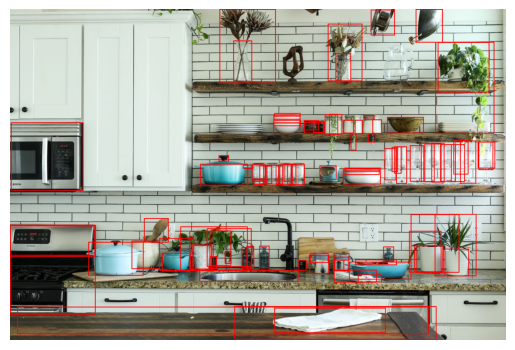

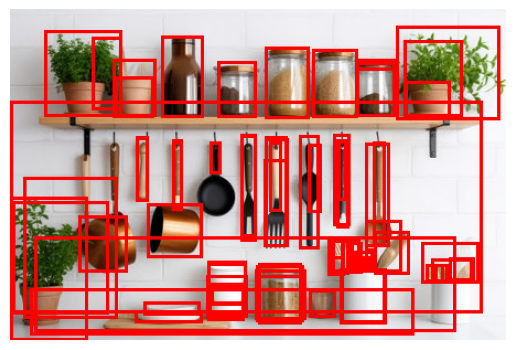

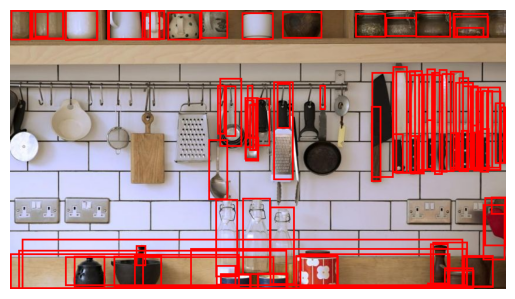

In [ ]:
# Instalamos PyTorch si no está instalado
!pip install torch torchvision

# Importamos las bibliotecas necesarias
import torch
import torchvision
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw
from google.colab import files
import matplotlib.pyplot as plt

# Cargamos el modelo Faster R-CNN pre-entrenado en COCO
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Función para realizar la detección de objetos en una imagen
def detect_objects(image):
    # Convertimos la imagen a tensor
    image_tensor = F.to_tensor(image)

    # Realizamos la inferencia
    with torch.no_grad():
        predictions = model([image_tensor])

    # Dibujamos los cuadros delimitadores en la imagen original
    draw = ImageDraw.Draw(image)
    for box in predictions[0]['boxes']:
        draw.rectangle([(box[0], box[1]), (box[2], box[3])], outline='red', width=3)

    # Mostramos la imagen con los cuadros delimitadores
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Función para cargar una imagen desde el sistema local
def load_image_and_detect_objects():
    uploaded = files.upload()
    for filename in uploaded.keys():
        image = Image.open(filename)
        detect_objects(image)

# Ejemplo de carga de imagen y detección de objetos
load_image_and_detect_objects()

